# Problem Statement
Perform sentimental analysis:
Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tweets = pd.read_csv('Elon_musk.csv',encoding='cp1252')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
tweets.drop(['Unnamed: 0'], inplace= True, axis= 1)
tweets

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Data Exploration

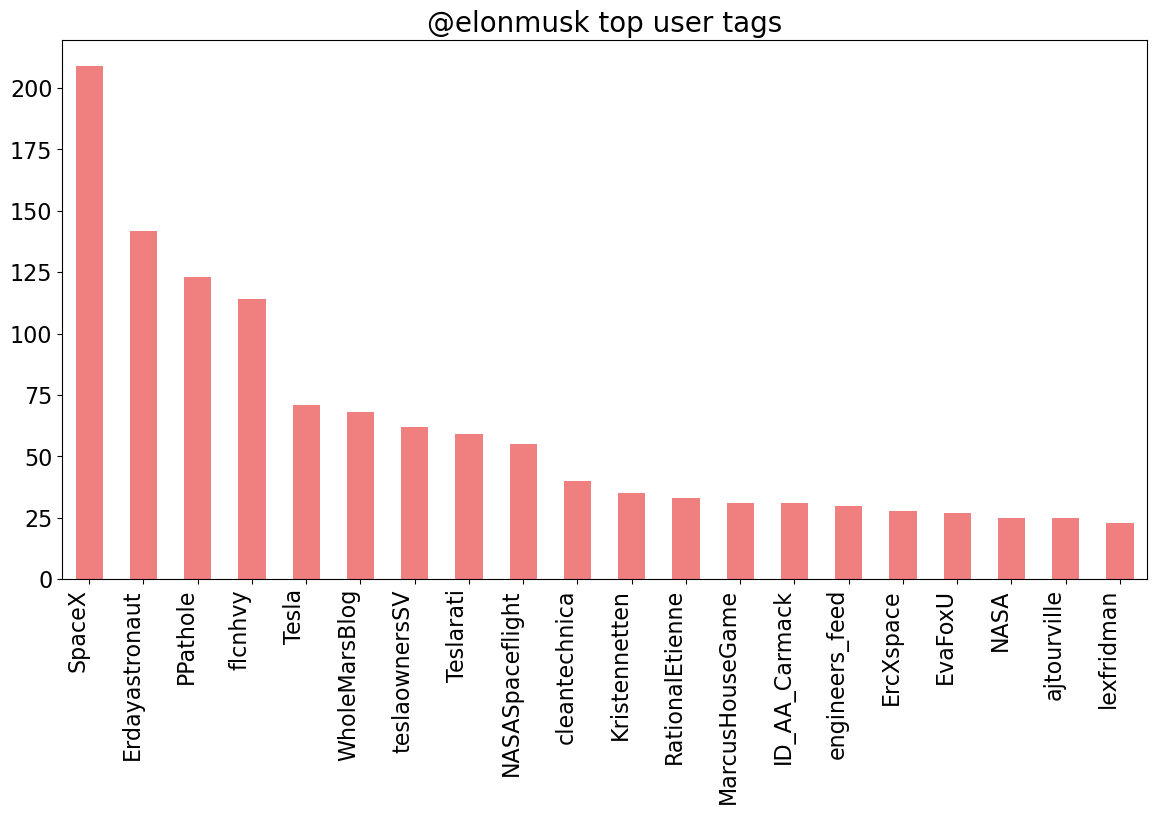

In [4]:
import itertools

c = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass


# BasicText Preprocessing
Cleaning the text by removing irrelevant information

In [5]:
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

tweets["Text"] = tweets["Text"].apply(clean_text) # Clean The Text
tweets.head(10)

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
5,happy new year of the ox
6,frodo was the underdoge\nall thought he would ...
7,owensparks flcnhvy haha thanks
8,flcnhvy indeed tweets definitely do not repre...
9,the most entertaining outcome is the most likely


# Word Frequency

In [6]:
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
Name: count, dtype: int64

# Removing the stopwords

In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Word Frequency after Removal of Stopwords

In [8]:
freq_stp = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
Name: count, dtype: int64

# Basic Feature Extaction

# #Count vectoriser tells the frequency of a word.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(tweets["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,aber,1,0.000076
1,able,6,0.000453
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
5,absence,1,0.000076
6,absolute,1,0.000076
7,absolutely,15,0.001133
8,absorb,1,0.000076
9,absorption,1,0.000076


# TFIDF - Term frequency inverse Document Frequency

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(tweets["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterdays,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-gram

# Bi-gram

In [11]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,pretty much,12
4,rt nasa,12
5,waemd spacex,11
6,giga berlin,10
7,first stage,10
8,teslaratiteam teslarati,10
9,nasa spacex,9


C:\Users\DELL\AppData\Local\Temp\ipykernel_2352\32883759.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])


[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'spacex falcon'),
 Text(2, 0, 'erdayastronaut spacex'),
 Text(3, 0, 'pretty much'),
 Text(4, 0, 'rt nasa'),
 Text(5, 0, 'waemd spacex'),
 Text(6, 0, 'giga berlin'),
 Text(7, 0, 'first stage'),
 Text(8, 0, 'teslaratiteam teslarati'),
 Text(9, 0, 'nasa spacex'),
 Text(10, 0, 'falcon first'),
 Text(11, 0, 'erdayastronaut flcnhvy'),
 Text(12, 0, 'flcnhvy tesla'),
 Text(13, 0, 'coming soon'),
 Text(14, 0, 'spacex dragon'),
 Text(15, 0, 'static fire'),
 Text(16, 0, 'crew dragon'),
 Text(17, 0, 'thesheetztweetz waemd'),
 Text(18, 0, 'astrobehnken astrodoug'),
 Text(19, 0, 'next year')]

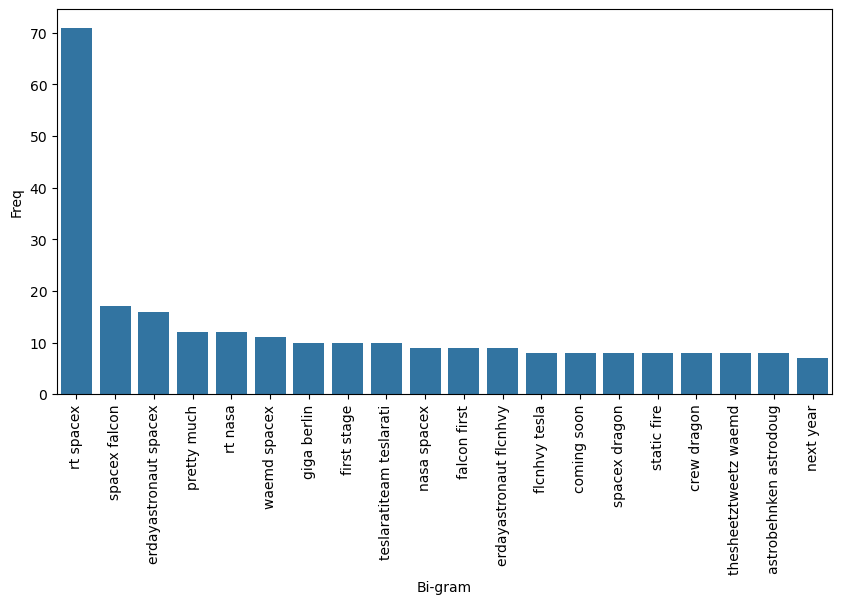

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])

In [13]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
5,ppathole thesheetztweetz waemd,7
6,waemd spacex spacexstarlink,7
7,first stage landed,6
8,rt spacex liftoff,6
9,spacex spacexstarlink wanationalguard,6


C:\Users\DELL\AppData\Local\Temp\ipykernel_2352\2373774295.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);


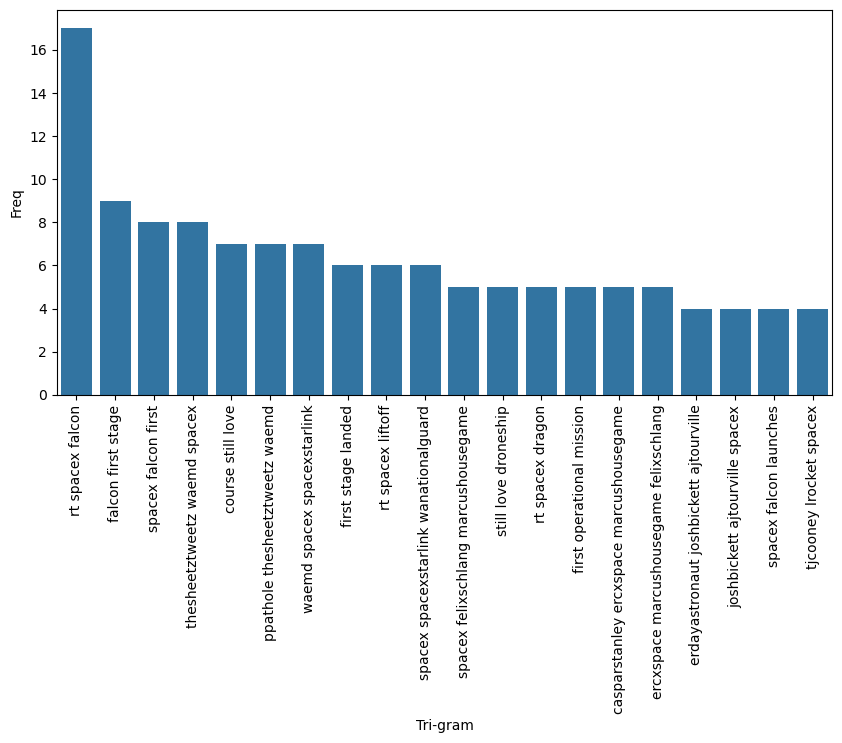

In [14]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# Wordcloud

In [15]:
string_Total = " ".join(tweets["Text"])

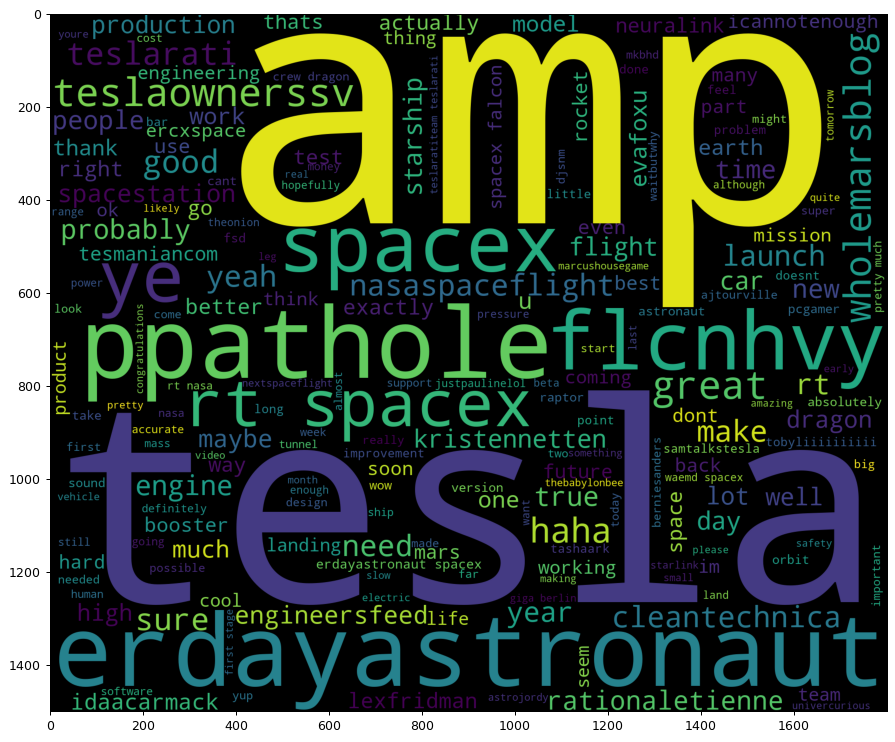

In [16]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

# Subjectivity and Polarity

In [17]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweets[["subjectivity", "polarity"]] = tweets.apply(sentiment_analysis, axis=1)
tweets.head(11)

,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
5,happy new year ox,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000
9,entertaining outcome likely,0.850000,0.250000


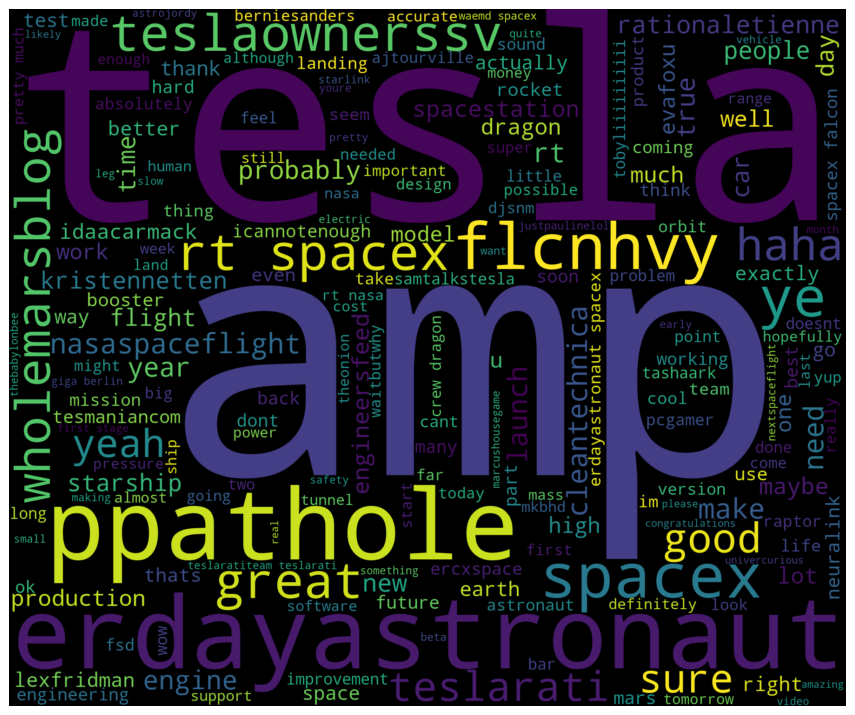

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in tweets["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [19]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
tweets["analysis"] = tweets["polarity"].apply(analysis)
positive_tweets = tweets[tweets['analysis'] == 'Positive']
negative_tweets = tweets[tweets['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


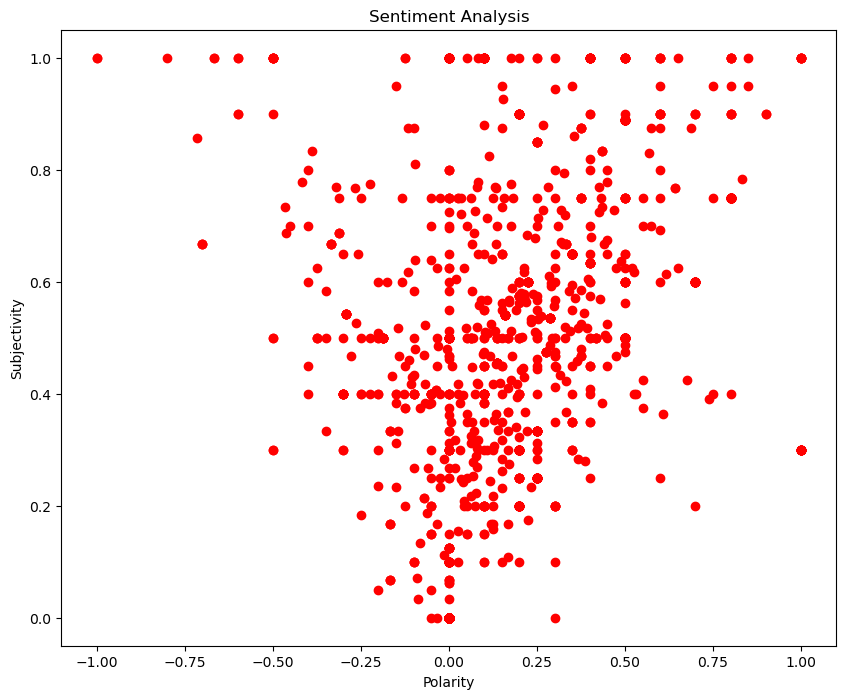

In [20]:
plt.figure(figsize=(10, 8))

for i in range(0, tweets.shape[0]):
    plt.scatter(tweets["polarity"][i], tweets["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [21]:
(len(positive_tweets) / len(negative_tweets))*100

422.11055276381904

# Colclusion: Since that number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.

# Problem Statement
Perform sentimental analysis:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [22]:
import requests
import re
from bs4 import BeautifulSoup
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

# Looping through multiple pages

In [24]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [25]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass
from tqdm import tqdm  # Import tqdm for console-based progress bars

# Rest of your code...

for x in tqdm(range(160)):  # Use tqdm instead of tqdm_notebook
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)

    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  6%|▋         | 10/160 [00:17<04:23,  1.76s/it]


# Save results to a Dataframe, then export as CSV


In [26]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
3,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",Reviewed in India on 10 December 2023
4,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,Reviewed in India on 16 December 2021
...,...,...,...,...
105,3.0 out of 5 stars\nFacing battery issue,3.0,Please arrange similar band because its band h...,Reviewed in India on 5 November 2023
106,4.0 out of 5 stars\nPretty long lasting,4.0,"Runs for 5-6 days. Works as expected, waterproof.",Reviewed in India on 25 September 2023
107,4.0 out of 5 stars\nItem,4.0,Nice product,Reviewed in India on 22 September 2023
108,3.0 out of 5 stars\nAverage display,3.0,Display resolution average given that its an A...,Reviewed in India on 28 October 2023


In [27]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)
df.head(10)

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
4,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
5,4.0 out of 5 stars\nSailing in the same boat…,4.0,Nice product given the price. The features are...,9 December 2023
6,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
7,4.0 out of 5 stars\nCalling facility,4.0,Nice product,19 December 2023
8,4.0 out of 5 stars\nGood,4.0,Good product.,15 December 2023
9,4.0 out of 5 stars\nAlexa is not working proper,4.0,It good watch for outdoor,14 December 2023


In [28]:
df.to_csv("BoatSmartWatch_Review.csv")

# Load Data set

In [29]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews


,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
4,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
...,...,...,...,...
105,3.0 out of 5 stars\nFacing battery issue,3.0,Please arrange similar band because its band h...,5 November 2023
106,4.0 out of 5 stars\nPretty long lasting,4.0,"Runs for 5-6 days. Works as expected, waterproof.",25 September 2023
107,4.0 out of 5 stars\nItem,4.0,Nice product,22 September 2023
108,3.0 out of 5 stars\nAverage display,3.0,Display resolution average given that its an A...,28 October 2023


# EDA

In [30]:
reviews.Rating.describe()

count    110.000000
mean       3.872727
std        0.543672
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [31]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       108 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [32]:
reviews.isna().sum()

Title          0
Rating         0
Review         2
Review_Date    0
dtype: int64

In [33]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nEverything is very good ex...,4.0,"Drawbacks•Let's know this first, which is not ...",10 December 2023
4,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021


# Data Visualization                                                                                                        Date vs Review Count


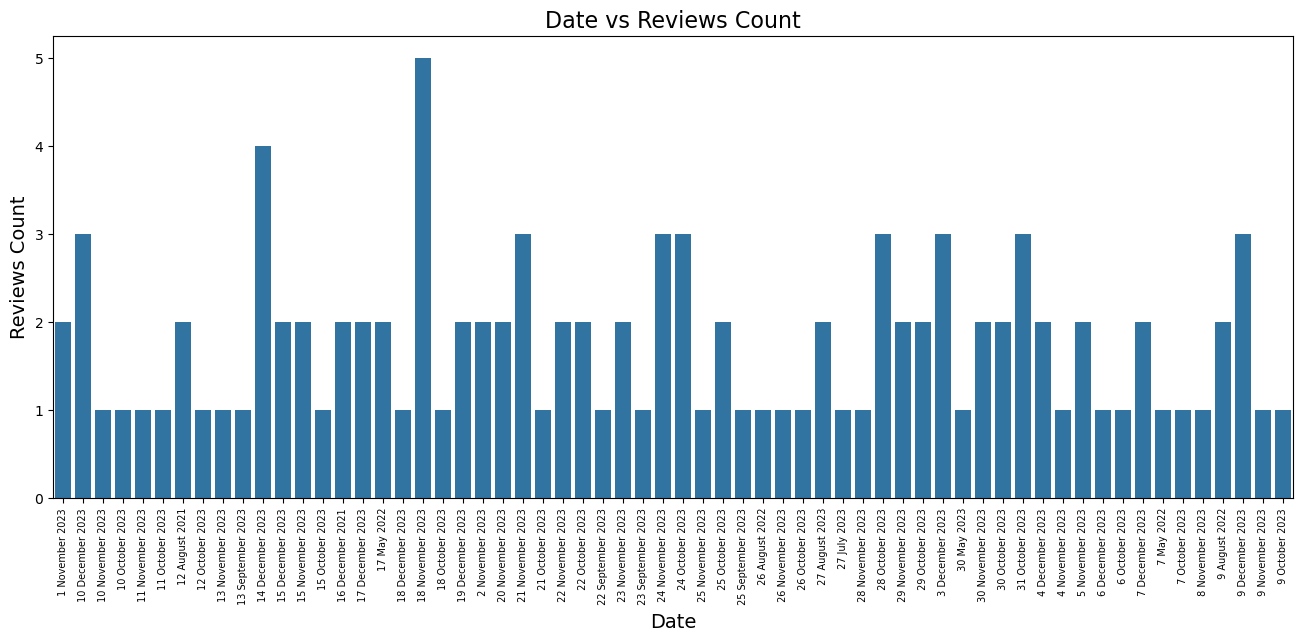

In [34]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

# Percentage of ratings

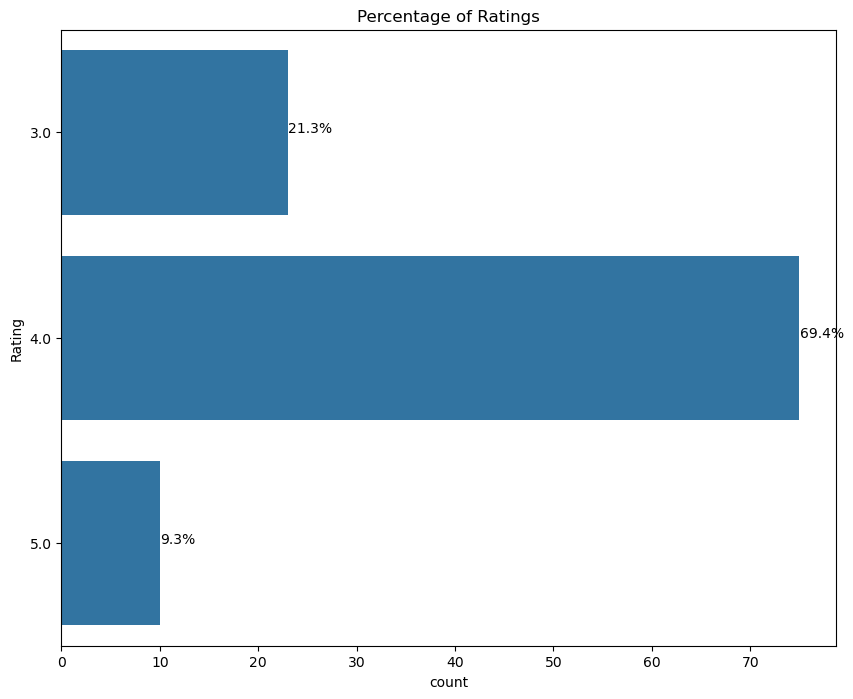

In [35]:
plt.figure(figsize=(10,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# BasicText Preprocessing for Sentiment Analysis

# Spelling Correction

In [36]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Review OverviewAverage2.The Coat today launche...
1    The media could not be loaded.\n              ...
2    Shipping the parts mostly covered in other rev...
3    Drawback•Met's know this first, which is not m...
4    Gros:1. Premium build quality with matter fini...
Name: Review, dtype: object

In [37]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Review OverviewAverage2.7The Boat today launch...
1,The media could not be loaded.\n ...
2,Skipping the parts mostly covered in other rev...
3,"Drawbacks•Let's know this first, which is not ..."
4,Pros:1. Premium build quality with matte finis...
...,...
105,Please arrange similar band because its band h...
106,"Runs for 5-6 days. Works as expected, waterproof."
107,Nice product
108,Display resolution average given that its an A...


# Resetting Index

In [38]:
boat_review.reset_index(drop=True, inplace=True)
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


C:\Users\DELL\AppData\Local\Temp\ipykernel_2352\2373109388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


# Lemmatizer

In [39]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

100%|██████████| 108/108 [00:04<00:00, 24.86it/s]


In [40]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


# Text Pre-processing Techniques

In [41]:
#Removing '@names'
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,nice product given price feature well designed...,nice product given price. the features well de...
6,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
7,nice product,nice product
8,good product,good product.
9,good watch outdoor,it good watch outdoor


In [42]:
#Removing links (http | https)
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,nice product given price feature well designed...,nice product given price. the features well de...
6,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
7,nice product,nice product
8,good product,good product.
9,good watch outdoor,it good watch outdoor


In [43]:
#Removing Review with empty text

dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,nice product given price feature well designed...,nice product given price. the features well de...
6,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
7,nice product,nice product
8,good product,good product.
9,good watch outdoor,it good watch outdoor


In [44]:
#Dropping duplicate rows

dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,nice product given price feature well designed...,nice product given price. the features well de...
6,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
7,nice product,nice product
8,good product,good product.
9,good watch outdoor,it good watch outdoor


In [45]:
#Function to remove emoji

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,nice product given price feature well designed...,nice product given price. the features well de...
6,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
7,nice product,nice product
8,good product,good product.
9,good watch outdoor,it good watch outdoor


In [46]:
#Removing Stop words

import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [47]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [48]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver..."
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,nice product given price feature well designed...,nice product given price. the features well de...
6,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
7,nice product,nice product
8,good product,good product.
9,good watch outdoor,it good watch outdoor


In [49]:
#Tokenize 'Clean_Reviews'

TextBlob(dataframe['Clean_Reviews'][1]).words
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [review, overviewaverage, boat, today, launche...
1    [medium, could, loaded, used, watch, month, bo...
2    [skipping, part, mostly, covered, review, spon...
3    [drawback, let, know, first, much, st, deliver...
4    [pro, premium, build, quality, matte, finishin...
5    [nice, product, given, price, feature, well, d...
6    [smart, model, boat, extend, plus, watch, func...
7                                      [nice, product]
8                                      [good, product]
9                               [good, watch, outdoor]
Name: Clean_Reviews, dtype: object

In [50]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
3,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver..."
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."
5,nice product given price feature well designed...,nice product given price. the features well de...,"[nice, product, given, price, feature, well, d..."
6,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
7,nice product,nice product,"[nice, product]"
8,good product,good product.,"[good, product]"
9,good watch outdoor,it good watch outdoor,"[good, watch, outdoor]"


In [51]:
#Converting words to Stemmer
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,review overviewaverag boat today launch boat x...
1,medium could load use watch month bought first...
2,skip part most cover review sponsor yt one add...
3,drawback let know first much st deliveri late ...
4,pro premium build qualiti matt finish sturdi p...
...,...
103,pleas arrang similar band band damag
104,run day work expect waterproof
105,nice product
106,display resolut averag given amol display


In [52]:
#Converting words to Lemma

from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,review overviewaverage boat today launched boa...
1,medium could loaded used watch month bought fi...
2,skipping part mostly covered review sponsored ...
3,drawback let know first much st delivery late ...
4,pro premium build quality matte finishing stur...
...,...
103,please arrange similar band band damaged
104,run day work expected waterproof
105,nice product
106,display resolution average given amoled display


# Basic Feature Extaction      

# Applying bag of Words without N grams

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)
print(cv.get_feature_names_out()[109:200])

['battery' 'beautiful' 'bed' 'beginning' 'believe' 'belt' 'beneficial'
 'benefitsnow' 'best' 'better' 'beyond' 'bezel' 'bhi' 'big' 'bigger'
 'bike' 'bip' 'birthday' 'bit' 'black' 'bloated' 'blood' 'bluetooth'
 'boat' 'body' 'bother' 'bought' 'box' 'bp' 'bpm' 'brand' 'break' 'breath'
 'breathing' 'bright' 'brightness' 'brings' 'broken' 'browsing' 'brushed'
 'bt' 'budget' 'bug' 'build' 'buildi' 'built' 'bulb' 'burn' 'burning'
 'burnt' 'bus' 'button' 'buy' 'buyer' 'buying' 'cable' 'cache'
 'calculated' 'calculating' 'calculation' 'calculator' 'calender' 'call'
 'called' 'caller' 'callin' 'calling' 'calorie' 'calory' 'cals' 'camera'
 'cannot' 'carddesign' 'care' 'case' 'category' 'catering' 'caused'
 'center' 'centerbefore' 'chahiye' 'change' 'changed' 'changer' 'charge'
 'charger' 'charging' 'charm' 'cheap' 'check' 'checked']


In [54]:
print(cv.get_feature_names_out()[:100])

['aaj' 'able' 'absolutely' 'ac' 'accept' 'acceptable' 'acceptance'
 'accepts' 'access' 'accessibility' 'accidentally' 'account' 'accuracy'
 'accuracybatteryyou' 'accuracycomparing' 'accurate' 'accurately' 'ach'
 'ackward' 'activate' 'activating' 'active' 'activites' 'activity'
 'actual' 'actually' 'adapter' 'add' 'added' 'addition' 'adjust' 'advance'
 'advanced' 'advertised' 'aggregate' 'ago' 'alarm' 'alert' 'alexa'
 'allowed' 'allowing' 'allows' 'almost' 'along' 'alright' 'also'
 'alternative' 'aluminium' 'always' 'amaze' 'amazfit' 'amazing' 'amazon'
 'amoled' 'amount' 'analog' 'android' 'angle' 'animal' 'animation'
 'anniversary' 'another' 'answer' 'anyone' 'anyonefor' 'anything'
 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'appearance' 'appeared' 'apple' 'application'
 'apps' 'appyou' 'around' 'arrange' 'arre' 'asakte' 'aside' 'asks'
 'aspect' 'assistant' 'assisted' 'atm' 'attached' 'attaching' 'attention'
 'attractive' 'audio' 'aur' 'auto' 'avail

In [55]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
#CountVectorizer with N-grams (Bigrams & Trigrams)

from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem import PorterStemmer
dataframe = dataframe.reset_index(drop=True)
ps = PorterStemmer()
corpus = []
for i in tqdm(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

100%|██████████| 107/107 [00:02<00:00, 42.27it/s]


In [57]:
corpus[3]

'drawback let know first much st deliveri late almost month order product guess may due great sale offer go time second problem watch batteri life mention descript go day right continu day actual use see time use app featur much otherwis hardli live day begin benefitsnow main part st though deliveri late good well protect secondli featuresthi boat xtend smartwatch realli good handi tech savvi person download boat wave app connect devic bluetooth better app set person everyth app health data almost accur keep track well well includ step count calori burn stress level bp oxygen level even menstruat cycl give weekli health report breath train featur also avail need kind sport activ includ cycl swim hike row cricket etc avail found phone flashlight weather forecast music featur phone stopwatch timer alarm sleep time featur well pretti good use take second process time type wake gestur hand free press side knob activ amazon alexa get watch like calcul easi math problem translat word differ 

In [58]:
#Applying Countvectorizer (Creating the Bag of Words model)


cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
X.shape

(107, 1546)

In [59]:
cv.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa', 'alexa support'], dtype=object)

In [60]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [61]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,...,worth price,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye,yt one
0,0,0,1,0,4,3,0,0,1,1,...,0,4,2,2,0,20,7,1,1,0
1,0,0,0,1,3,1,1,1,3,0,...,0,0,0,0,0,1,0,1,1,0
2,0,1,1,0,0,1,0,0,6,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,2,1,...,0,0,0,0,0,1,1,0,0,0
4,1,3,0,0,3,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#TF-IDF Vectorizer
ps = PorterStemmer()
corpus = []
for i in tqdm(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

100%|██████████| 107/107 [00:02<00:00, 46.98it/s]


In [63]:
corpus[4]

'pro premium build qualiti matt finish sturdi polycarbon frame good soft silicon strap r absolut flush bodi watch attract trendi colour heart rate except heart rate spike weight train pedomet step counter accur spo compar puls oximet read smart watch offer accuraci sleep track accur bed time wake time durat stage sleep inaccur light deep sleep wake detect rem sleep detect sleep data watch synchronis smoothli boat wave app issu warn msg watch worn hand properli detect data surfac larg clear bright sharp lcd ip display even sun touch smooth experienc jitter ui also lag time attach temper glass sometim function requir tap work accept scroll respons finger move diagon instead vertic app gp work superbl excel rout track map featur advertis descript bluetooth connect good mobil kept close proxim boat wave app must remain run background time definit splash proof though nt take risk submerg watch notif work problem call alert sm msg social medium app notif lag though provis sec lag turn alexa 

# Applying TF-IDF Vectorizer

In [64]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()
X.shape

(107, 1546)

In [65]:
tfidf_v.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa', 'alexa support'], dtype=object)

In [66]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [67]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,...,worth price,would,would recommend,would recommend go,wrist,xtend,xtend smartwatch,xtend watch,ye,yt one
0,0.000000,0.000000,0.014676,0.00000,0.052097,0.039073,0.00000,0.00000,0.012698,0.016591,...,0.0,0.063392,0.037343,0.037343,0.000000,0.275341,0.116135,0.015848,0.013767,0.000000
1,0.000000,0.000000,0.000000,0.02834,0.066744,0.022248,0.02834,0.02834,0.065073,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.023517,0.000000,0.027071,0.023517,0.000000
2,0.000000,0.027892,0.026895,0.00000,0.000000,0.023868,0.00000,0.00000,0.139625,0.000000,...,0.0,0.000000,0.000000,0.000000,0.026895,0.000000,0.000000,0.000000,0.000000,0.034217
3,0.000000,0.000000,0.000000,0.00000,0.042150,0.000000,0.00000,0.00000,0.082189,0.053691,...,0.0,0.000000,0.000000,0.000000,0.000000,0.044553,0.053691,0.000000,0.000000,0.000000
4,0.033647,0.087792,0.000000,0.00000,0.075127,0.025042,0.03190,0.03190,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.028218,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
103,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
104,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
105,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
#Named Entity Recognition (NER)

reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'review overviewaverage boat today launched boat xtend company latest budget smartwatch price tag r boat xtend smartwatch come stylish design resembling apple watch moreover built amazon alexa support spo tracking stress tracking much coming budget segment worth buy smartwatch query nothing worry detailed review boat xtend smartwatch clear doubt contentsbox contentdesign build comfortdisplaywatch ui featuresalexa supportwatch facesboat wave appaccuracybatteryfinal wordsbuy box contentboat xtend box contentsmartwatch black gold colourcharging clipuser manual warranty carddesign build comfortwhen buying smartwatch one always think design look apart feature design build another major aspect one take care buying smartwatch boat worked design time brings premium side term look design inspired apple watch cannot compared obviously every aspect apple watch would much better boat xtend smartwatch redmi watch well amazfit bip u pro shape design build quality much premium one boat xtend design b

In [76]:
#Feature Extraction
#A. BOW Features


bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])
#B. TF-IDF Features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')


# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])
#10. Fetch sentiments Using TextBlob
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())


,count
Clean_Reviews,
pos,101
neg,6


In [77]:
#Let's calculate subjectivity and Polarity

def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266
3,drawback let know first much st delivery late ...,"drawbacks•let's know first, much...1st deliver...","[drawback, let, know, first, much, st, deliver...",0.506098,0.296569
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin...",0.533112,0.292296


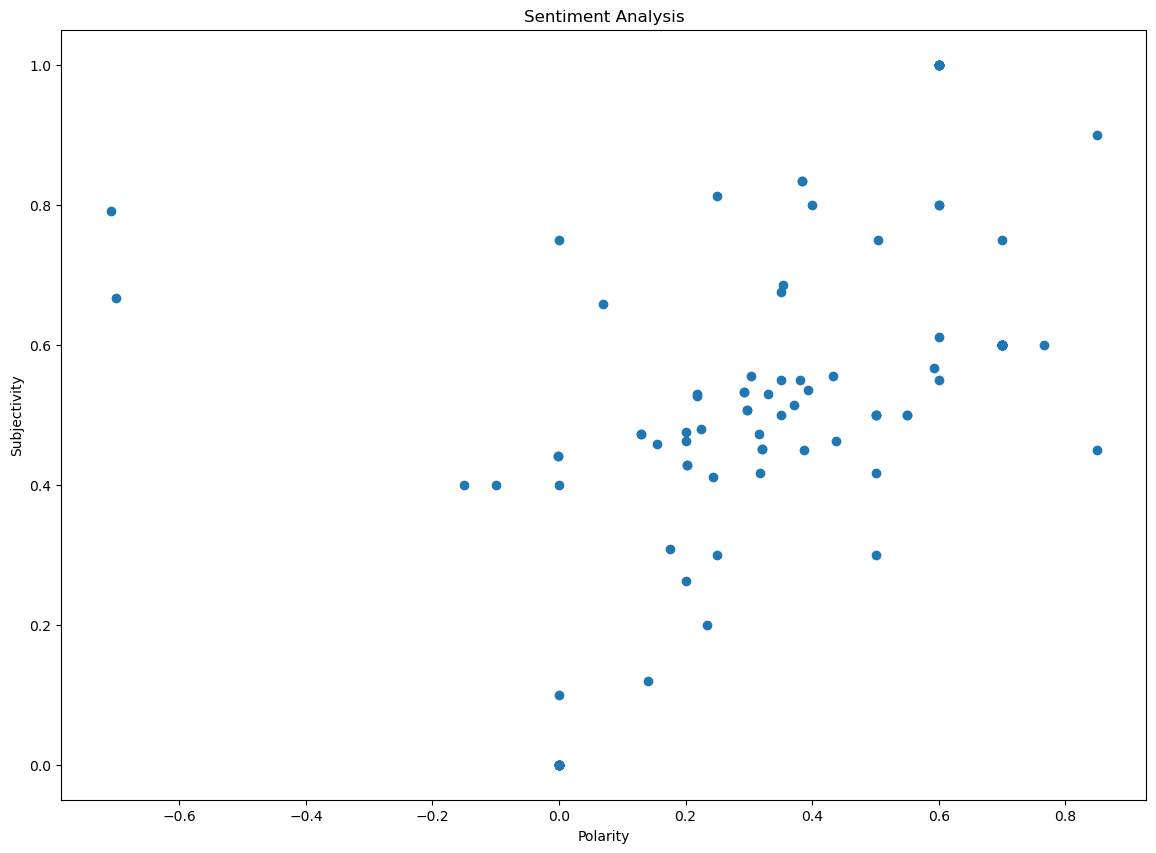

In [78]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

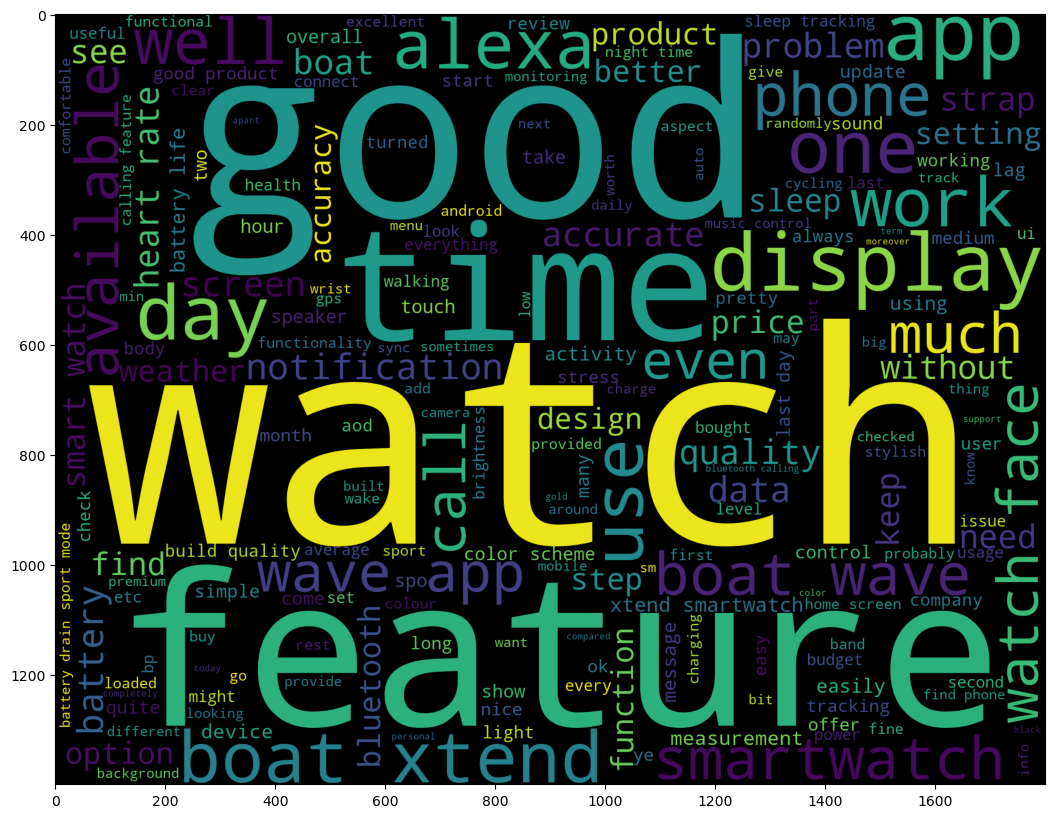

In [80]:
 #Story Generation and Visualization
    
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

# Most positive words

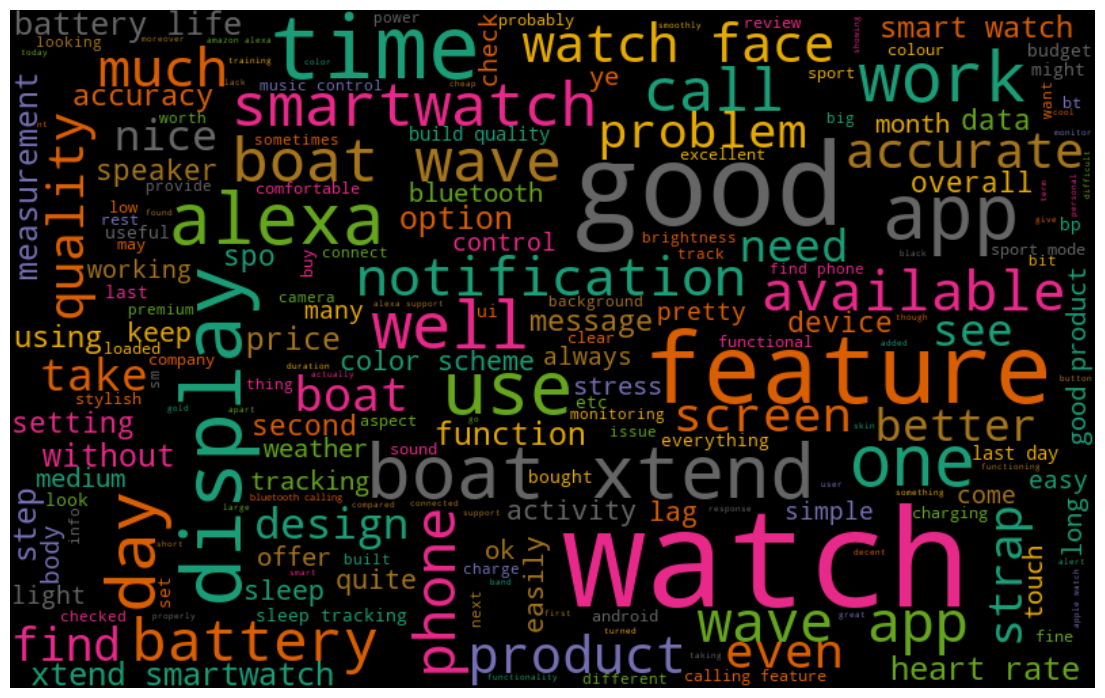

In [83]:

def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

# Most common words in negative Review

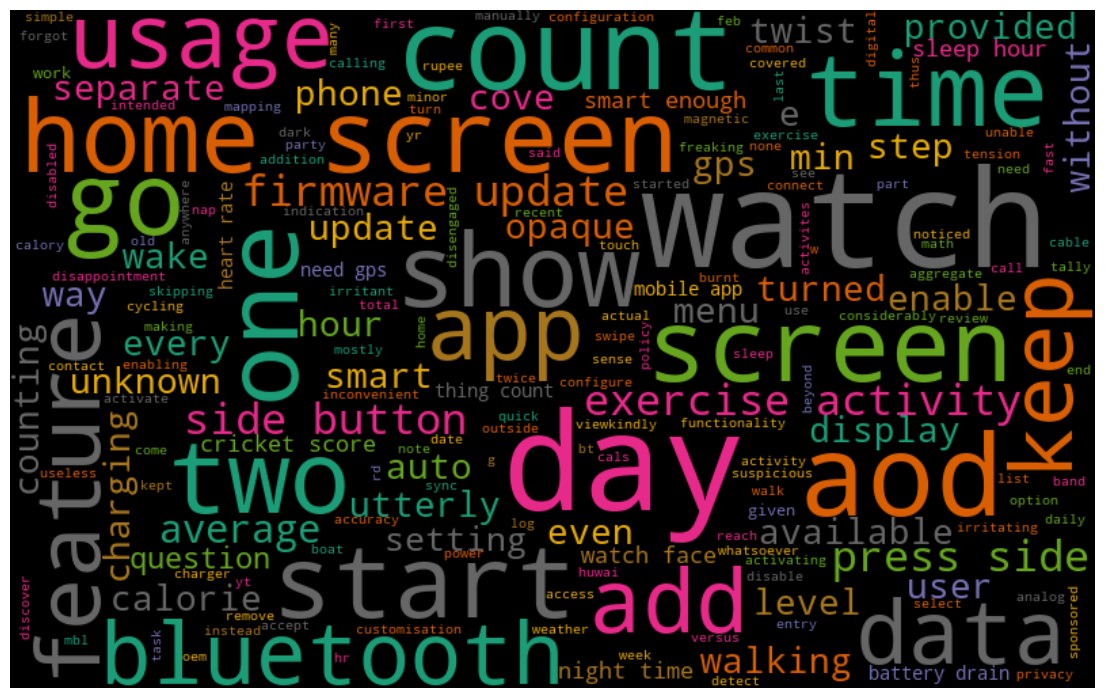

In [84]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)